In [1]:
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('bmh')
%matplotlib inline
import math

In [2]:
df = pd.read_csv('Pokemonstats.csv')

In [3]:
#Checking out the data frame
df.head()

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight (kg),Height (m),Generation
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,6.9,0.7,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,13.0,1.0,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,100.0,2.0,1
3,4,Charmander,Fire,Fire,39,52,43,60,50,65,309,8.5,0.6,1
4,5,Charmeleon,Fire,Fire,58,64,58,80,65,80,405,19.0,1.1,1


In [4]:
#renamed some columns for convenience
df.rename(columns = {'Weight (kg)': 'Weight', 'Height (m)' : 'Height'}, inplace = True)

In [5]:
 #Creates a column that sums offensive stats
df['Offensive Stats'] = df['Attack'] + df['Sp. Attack'] + df['Speed']

In [6]:
#Creates a column that sums defensive stats
df['Defensive Stats'] = df['HP'] + df['Defense'] + df['Sp. Defense'] 

In [7]:
#BMI Calculator for pokemon
df['BMI'] = df['Weight']/(df['Height']**2)

In [8]:
#This looks for all poison type pokemon
df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,6.9,0.7,1,159,159,14.081633
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,13.0,1.0,1,202,203,13.000000
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,100.0,2.0,1,262,263,25.000000
12,13,Weedle,Bug,Poison,40,35,30,20,20,50,195,3.2,0.3,1,105,90,35.555556
13,14,Kakuna,Bug,Poison,45,25,50,25,25,35,205,10.0,0.6,1,85,120,27.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,Revavroom,Steel,Poison,80,119,90,54,67,90,500,120.0,1.8,9,263,237,37.037037
968,969,Glimmet,Rock,Poison,48,35,42,105,60,60,350,8.0,0.7,9,200,150,16.326531
969,970,Glimmora,Rock,Poison,83,55,90,130,81,86,525,45.0,1.5,9,271,254,20.000000
979,980,Clodsire,Poison,Ground,130,75,60,45,100,20,430,223.0,1.8,9,140,290,68.827160


In [9]:
#This finds the id number of the pokemon with the highest attack
#then uses iloc to find the information related to id number
df.iloc[df['Attack'].idxmax()]

National Dex Number         798
Name                    Kartana
Type 1                    Grass
Type 2                    Steel
HP                           59
Attack                      181
Defense                     131
Sp. Attack                   59
Sp. Defense                  31
Speed                       109
Stat Total                  570
Weight                      0.1
Height                      0.3
Generation                    7
Offensive Stats             349
Defensive Stats             221
BMI                    1.111111
Name: 797, dtype: object

In [10]:
#df[df['Type 1'] == 'Poison'] creates a new data frame of Pokemon with Type 1 = Poison. We then select only the 
#Attack column and we use argmax to return the index number of the pokemon, then we use iloc to find all of the data related
df.iloc[df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]['Attack'].idxmax()]

National Dex Number          903
Name                    Sneasler
Type 1                  Fighting
Type 2                    Poison
HP                            80
Attack                       130
Defense                       60
Sp. Attack                    40
Sp. Defense                   80
Speed                        120
Stat Total                   510
Weight                      43.0
Height                       1.3
Generation                     8
Offensive Stats              290
Defensive Stats              220
BMI                    25.443787
Name: 902, dtype: object

In [11]:
df.iloc[df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]['Sp. Attack'].idxmax()]

National Dex Number          890
Name                   Eternatus
Type 1                    Poison
Type 2                    Dragon
HP                           140
Attack                        85
Defense                       95
Sp. Attack                   145
Sp. Defense                   95
Speed                        130
Stat Total                   690
Weight                     950.0
Height                      20.0
Generation                     8
Offensive Stats              360
Defensive Stats              330
BMI                        2.375
Name: 889, dtype: object

In [12]:
df.iloc[df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]['Sp. Attack'].idxmax()]['Name']

'Eternatus'

In [13]:
df.iloc[df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]['Sp. Attack'].argmax()]
#This returns bellsprout because it'returning the index number of the pokemon with the highest special attack
#within the Poison pokemon data frame. It then locates it and matches it against the index number of the ENTIRE
#dataframe, which is why it gives number 68, when it's actually national dex number #890.

National Dex Number            69
Name                   Bellsprout
Type 1                      Grass
Type 2                     Poison
HP                             50
Attack                         75
Defense                        35
Sp. Attack                     70
Sp. Defense                    30
Speed                          40
Stat Total                    300
Weight                        4.0
Height                        0.7
Generation                      1
Offensive Stats               185
Defensive Stats               115
BMI                      8.163265
Name: 68, dtype: object

In [14]:
avg_stats = df.describe()

In [15]:
avg_stats

,National Dex Number,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,504.500000,69.757937,77.167659,71.965278,69.558532,69.764881,66.838294,425.052579,65.988690,1.204762,4.669643,213.564484,211.488095,139.941880
std,291.128837,26.688481,29.755786,29.235607,29.494896,26.689864,28.637803,112.300164,120.093055,1.245742,2.596497,66.367217,63.473551,3148.427564
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,0.100000,0.100000,1.000000,25.000000,60.000000,0.039062
25%,252.750000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,320.000000,8.500000,0.500000,3.000000,165.000000,162.000000,19.323638
50%,504.500000,66.000000,75.000000,69.000000,65.000000,65.000000,65.000000,441.000000,28.000000,1.000000,5.000000,210.000000,210.000000,29.353612
75%,756.250000,82.000000,100.000000,90.000000,90.000000,85.000000,87.000000,505.000000,68.050000,1.500000,7.000000,260.000000,259.000000,43.850000
max,1008.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,999.900000,20.000000,9.000000,450.000000,480.000000,99990.000000


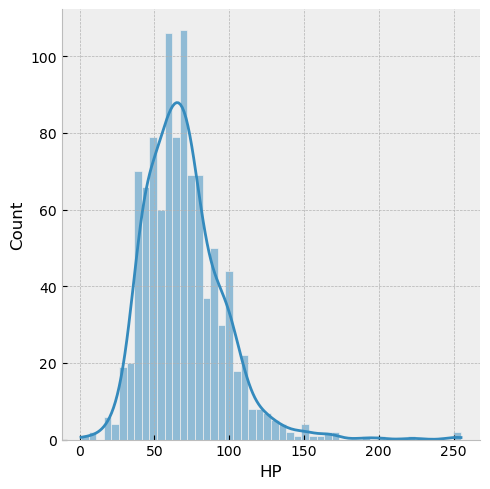

In [16]:
sns.displot(df['HP'], kde = True, bins = 50)

In [17]:
#This creates dataframes based on steel, fighting, and bug typings
steel = df[(df['Type 1'] == 'Steel') | (df['Type 2'] == 'Steel')]
fighting = df[(df['Type 1'] == 'Fighting') | (df['Type 2'] == 'Fighting')]
bug = df[(df['Type 1'] == 'Bug') | (df['Type 2'] == 'Bug')]

In [18]:
bug

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
9,10,Caterpie,Bug,Bug,45,30,35,20,20,45,195,2.9,0.3,1,95,100,32.222222
10,11,Metapod,Bug,Bug,50,20,55,25,25,30,205,9.9,0.7,1,75,130,20.204082
11,12,Butterfree,Bug,Flying,60,45,50,80,80,70,385,32.0,1.1,1,195,190,26.446281
12,13,Weedle,Bug,Poison,40,35,30,20,20,50,195,3.2,0.3,1,105,90,35.555556
13,14,Kakuna,Bug,Poison,45,25,50,25,25,35,205,10.0,0.6,1,85,120,27.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,919,Nymble,Bug,Bug,33,46,40,21,25,45,210,1.0,0.2,9,112,98,25.000000
919,920,Lokix,Bug,Dark,71,102,78,52,55,92,450,17.5,1.0,9,246,204,17.500000
952,953,Rellor,Bug,Bug,41,50,60,31,58,30,270,1.0,0.2,9,111,159,25.000000
953,954,Rabsca,Bug,Psychic,75,50,85,115,100,45,470,3.5,0.3,9,210,260,38.888889


In [19]:
#I ended up not using this, but this creates a data frame using steel and bug
#types combined
steel_bug = pd.concat([steel, bug])

In [20]:
#Unfortunately, there are pokemon that are both bug AND Steel type, such as Scizor
#So this removes any duplicate rows from the dataframe
steel_bug.drop_duplicates(subset = ['Name'])

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
80,81,Magnemite,Electric,Steel,25,35,70,95,55,45,325,6.0,0.3,1,175,150,66.666667
81,82,Magneton,Electric,Steel,50,60,95,120,70,70,465,60.0,1.0,1,250,215,60.000000
204,205,Forretress,Bug,Steel,75,90,140,60,60,40,465,125.8,1.2,2,190,275,87.361111
207,208,Steelix,Steel,Ground,75,85,200,55,65,30,510,400.0,9.2,2,170,340,4.725898
211,212,Scizor,Bug,Steel,70,130,100,55,80,65,500,118.0,1.8,2,250,250,36.419753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,919,Nymble,Bug,Bug,33,46,40,21,25,45,210,1.0,0.2,9,112,98,25.000000
919,920,Lokix,Bug,Dark,71,102,78,52,55,92,450,17.5,1.0,9,246,204,17.500000
952,953,Rellor,Bug,Bug,41,50,60,31,58,30,270,1.0,0.2,9,111,159,25.000000
953,954,Rabsca,Bug,Psychic,75,50,85,115,100,45,470,3.5,0.3,9,210,260,38.888889


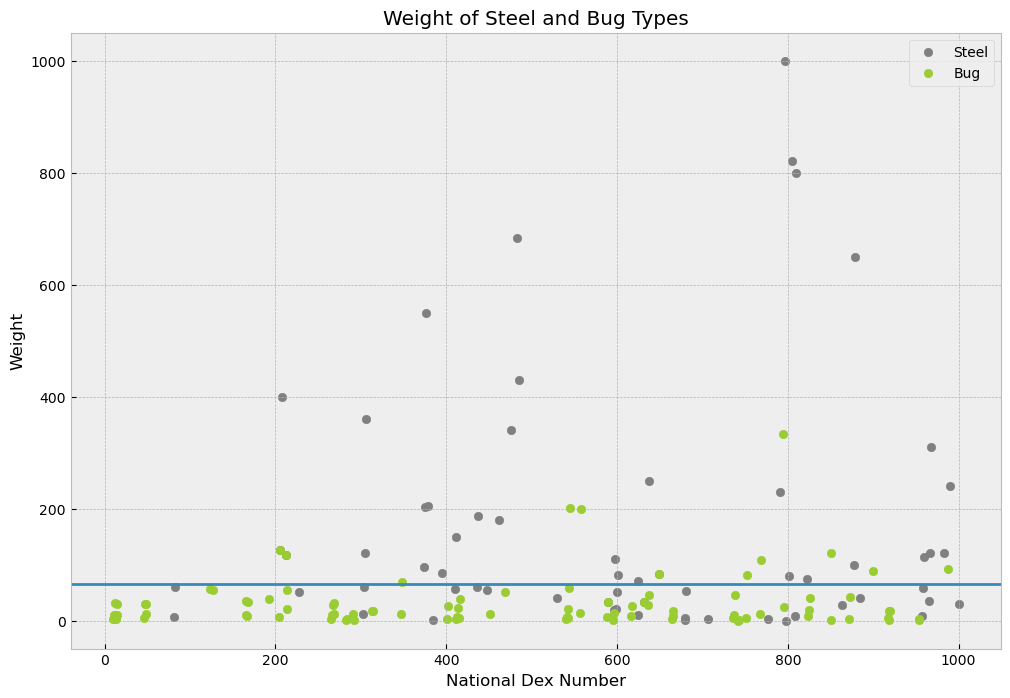

In [21]:
#This creates a graph showing that on average, steel types weigh more than bug types
#I also added a line showing the mean weight of all pokemon. As we can see, steel types
#are usually heavier than average, and bug types less than average
fig = plt.figure(figsize = (12,8))
plt.scatter(steel['National Dex Number'], steel['Weight'],  color = 'gray', label = 'Steel')
plt.scatter(bug['National Dex Number'], bug['Weight'], color = 'yellowgreen', label = 'Bug')
plt.xlabel('National Dex Number')
plt.ylabel('Weight')
plt.title('Weight of Steel and Bug Types')
plt.axhline(df['Weight'].mean())
plt.legend()
plt.show()

Text(0, 0.5, 'BMI')

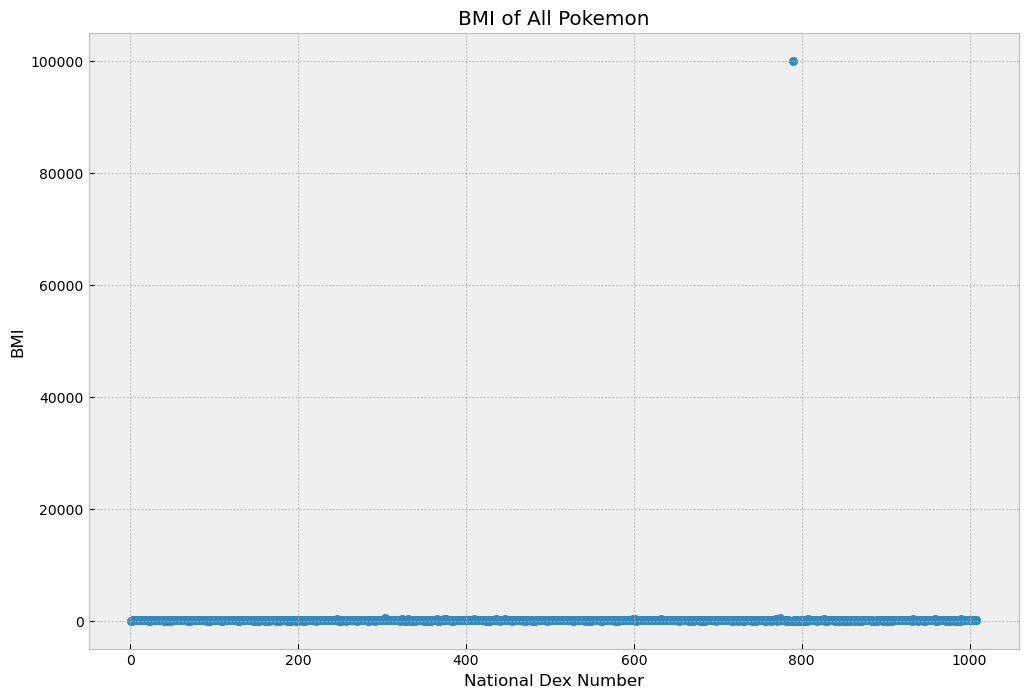

In [22]:
#This graph was supposed to show the BMI of all Pokemon, but it also revealed
#one extreme outlier
fig = plt.figure(figsize = (12,8))
plt.scatter(df['National Dex Number'], df['BMI'])
plt.title('BMI of All Pokemon')
plt.xlabel('National Dex Number')
plt.ylabel('BMI')

In [23]:
df.iloc[df['BMI'].idxmax()]

National Dex Number        790
Name                   Cosmoem
Type 1                 Psychic
Type 2                 Psychic
HP                          43
Attack                      29
Defense                    131
Sp. Attack                  29
Sp. Defense                131
Speed                       37
Stat Total                 400
Weight                   999.9
Height                     0.1
Generation                   7
Offensive Stats             95
Defensive Stats            305
BMI                    99990.0
Name: 789, dtype: object

In [24]:
#This creates a dataframe without the outlier, Cosmoem, and checks to see what the
#new highest BMi is
no_cosmoem = df.drop([0, 789])
no_cosmoem.iloc[df['BMI'].idxmax()]

National Dex Number        792
Name                    Lunala
Type 1                 Psychic
Type 2                   Ghost
HP                         137
Attack                     113
Defense                     89
Sp. Attack                 137
Sp. Defense                107
Speed                       97
Stat Total                 680
Weight                   120.0
Height                     4.0
Generation                   7
Offensive Stats            347
Defensive Stats            333
BMI                        7.5
Name: 791, dtype: object

Text(0, 0.5, 'BMI')

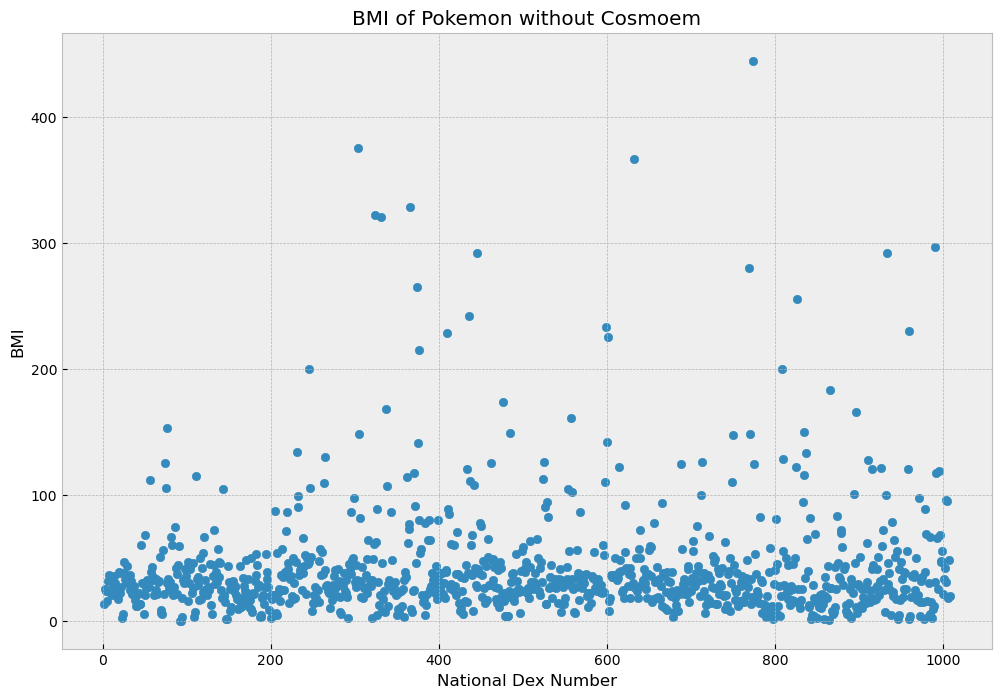

In [25]:
#Here's a scatterplot of the BMI of all pokemon without Cosmoem
fig = plt.figure(figsize = (12,8))
plt.scatter(no_cosmoem['National Dex Number'], no_cosmoem['BMI'])
plt.title('BMI of Pokemon without Cosmoem')
plt.xlabel('National Dex Number')
plt.ylabel('BMI')

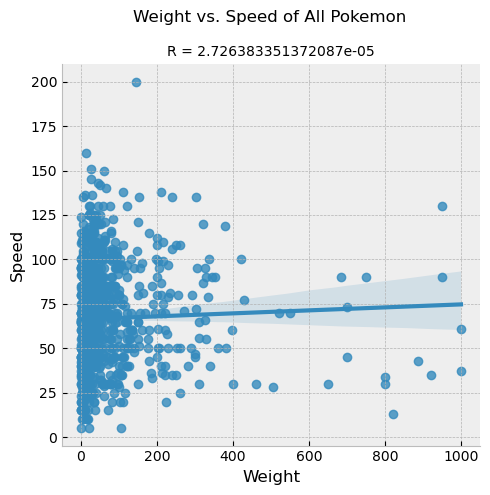

In [26]:
#I was curious to see if lighter or faster pokemon have higher speed stats
#I manually calculated out the R value and posted it in the title
#Looking at the graph and R values, there is no correlation betweent the weight of a pokemon or its speed
sns.lmplot(x = 'Weight', y = 'Speed', data = df)
plt.title('R = 2.726383351372087e-05', fontdict = {'fontsize': 10 })
plt.suptitle('Weight vs. Speed of All Pokemon', x = .55)
#x = .55 is used to better center the X axis of the sup title
plt.tight_layout()

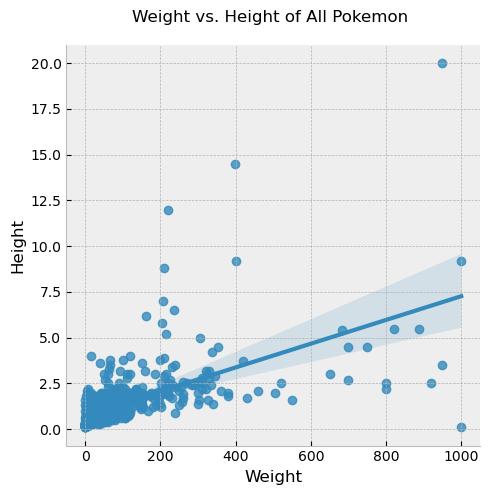

In [27]:
#However, if we look at weight vs. height, we see a definite correlation between taller pokemon being heavier as well
sns.lmplot(x = 'Weight', y = 'Height', data = df)
plt.suptitle('Weight vs. Height of All Pokemon', x = .55)
#x = .55 is used to better center the X axis of the sup title
plt.tight_layout()

In [28]:
#this shows my calculations for the R value
pearson_x = df['Weight'].sum()
pearson_y = df['Speed'].sum()
pearson_xy = (df['Weight'] * df['Speed']).sum()
pearson_x2 = (pearson_x**2).sum()
pearson_y2 = (pearson_y**2).sum()

In [29]:
bottom = (df['Name'].count()*pearson_x2 - pearson_x**2) * (df['Name'].count()*pearson_y2 - pearson_y**2)
top = (df['Name'].count()*pearson_xy - pearson_x * pearson_y)

In [30]:
top / math.sqrt(bottom)

2.726383351372087e-05

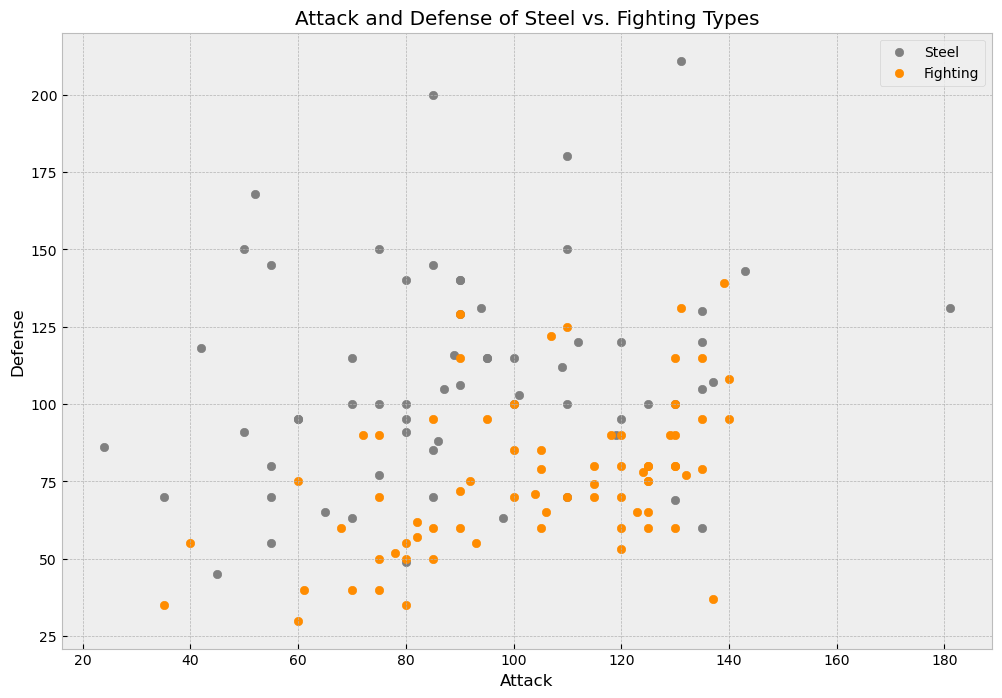

In [31]:
#This graph shows the distribution of attack and defense stats of steel and fighting types
#As we can see, fighting types tend to have more attack stats, and steel has more defense
fig = plt.figure(figsize = (12,8))
plt.scatter(steel['Attack'], steel['Defense'],  color = 'gray', label = 'Steel')
plt.scatter(fighting['Attack'], fighting['Defense'], color = 'darkorange', label = 'Fighting')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack and Defense of Steel vs. Fighting Types')
plt.legend()
plt.show()

In [32]:
df.iloc[steel['Attack'].idxmax()]

National Dex Number         798
Name                    Kartana
Type 1                    Grass
Type 2                    Steel
HP                           59
Attack                      181
Defense                     131
Sp. Attack                   59
Sp. Defense                  31
Speed                       109
Stat Total                  570
Weight                      0.1
Height                      0.3
Generation                    7
Offensive Stats             349
Defensive Stats             221
BMI                    1.111111
Name: 797, dtype: object

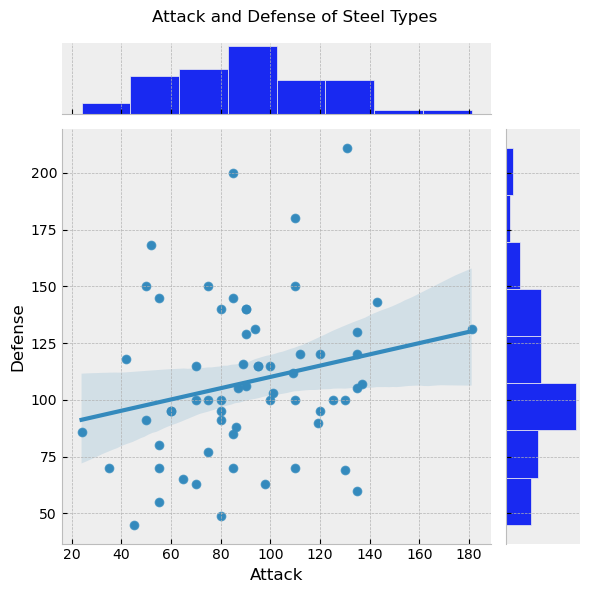

In [33]:
#joint plot sets up this dual plot. We use .plot and the first input is the 
#type of plot for the main graph, and second is for the outer ones. We then use
#.fig.suptitle to add in a title
sns.jointplot(data = steel, x = 'Attack', y = 'Defense').plot(sns.regplot, sns.histplot).fig.suptitle('Attack and Defense of Steel Types') 
plt.tight_layout()

In [34]:
gen = df.groupby('Generation').mean()

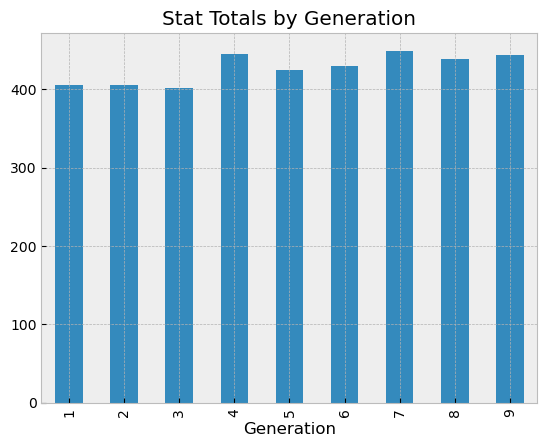

In [35]:
#We can see here that there is some small amount of power creep across the generations
gen['Stat Total'].plot.bar()
plt.title('Stat Totals by Generation')
plt.show()

In [36]:
#Just like we can use head to see the top of a data frame, we can use tail to see
#the bottom of one. This sorts a dataframe by a column then finds the last 5 rows
df.sort_values('Stat Total').tail()

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
149,150,Mewtwo,Psychic,Psychic,106,110,90,154,90,130,680,122.0,2.0,1,394,286,30.500000
482,483,Dialga,Steel,Dragon,100,120,120,150,100,90,680,683.0,5.4,4,360,320,23.422497
248,249,Lugia,Psychic,Flying,106,90,130,90,154,110,680,216.0,5.2,2,290,390,7.988166
889,890,Eternatus,Poison,Dragon,140,85,95,145,95,130,690,950.0,20.0,8,360,330,2.375000
492,493,Arceus,Normal,Normal,120,120,120,120,120,120,720,320.0,3.2,4,360,360,31.250000


In [37]:
#this creates a special data frame that only contains battle stat information
df_stats = df.drop(['National Dex Number', 'Stat Total', 'Weight', 'Height', 'Generation', 'BMI'], axis = 1)

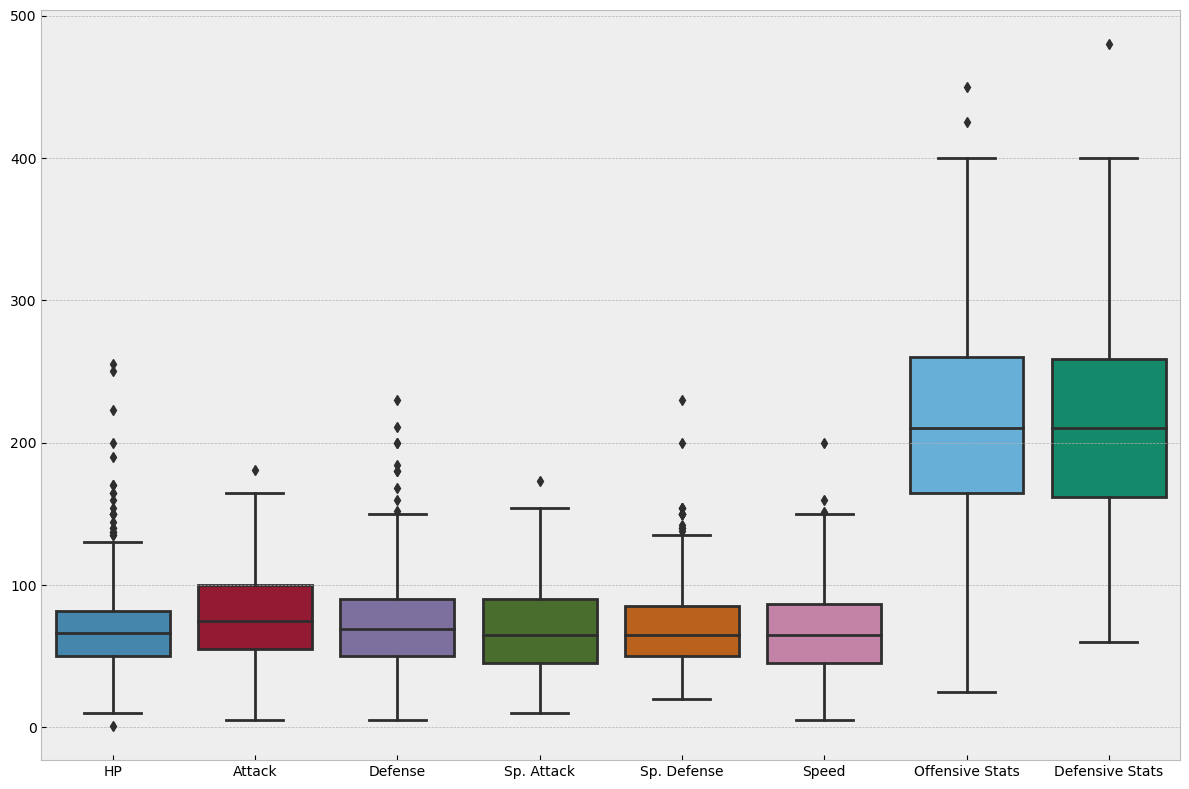

In [38]:
#This is a boxplot of the battle stat data
fig = plt.figure(figsize = (12,8))
sns.boxplot(data = df_stats)
plt.tight_layout()

In [39]:
#this sorts the df dataframe by type 1 and then takes the mean value of each column
type1_attack = df.groupby(by = ['Type 1']).median()
type1_attack

,National Dex Number,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
Type 1,,,,,,,,,,,,,,
Bug,469.0,60.0,62.0,60.0,50.0,58.0,55.0,385.0,16.50,0.80,4.0,184.0,185.0,27.777778
Dark,633.0,70.0,90.0,70.0,65.0,70.0,70.0,488.0,35.00,1.10,5.0,241.0,212.0,30.000000
Dragon,644.0,75.0,95.0,71.0,70.0,75.0,82.0,490.0,56.00,1.60,5.0,252.0,236.0,32.638889
Electric,594.5,63.5,72.5,60.0,83.0,70.0,90.5,452.5,24.00,0.85,5.0,245.0,197.5,29.705038
Fairy,685.0,70.0,60.0,70.0,70.0,80.0,60.0,462.0,8.90,0.60,6.0,215.0,225.0,21.666667
Fighting,579.0,73.5,105.0,75.0,50.0,64.0,65.0,465.0,48.90,1.30,5.0,233.5,220.0,31.222222
Fire,499.0,67.0,78.0,60.0,80.0,66.0,73.0,470.0,30.70,1.00,5.0,245.0,215.0,30.555556
Flying,822.0,70.0,85.0,70.0,60.0,80.0,82.0,485.0,37.00,1.50,8.0,245.0,220.0,28.000000
Ghost,608.0,55.0,65.0,65.0,83.0,75.0,56.0,474.0,12.50,1.00,5.0,219.0,225.0,18.000000


In [40]:
type1_attack['Attack']

Type 1
Bug          62.0
Dark         90.0
Dragon       95.0
Electric     72.5
Fairy        60.0
Fighting    105.0
Fire         78.0
Flying       85.0
Ghost        65.0
Grass        68.0
Ground       90.0
Ice          69.0
Normal       75.0
Poison       73.0
Psychic      55.0
Rock         81.0
Steel        85.0
Water        70.0
Name: Attack, dtype: float64

In [41]:
#this sorts the mean attack values from lowest to highest, and then creates
#a list using their indexes as shown below.
type1_attack_index = type1_attack['Attack'].sort_values().index

In [42]:
type1_attack_index

Index(['Psychic', 'Fairy', 'Bug', 'Ghost', 'Grass', 'Ice', 'Water', 'Electric',
       'Poison', 'Normal', 'Fire', 'Rock', 'Flying', 'Steel', 'Ground', 'Dark',
       'Dragon', 'Fighting'],
      dtype='object', name='Type 1')

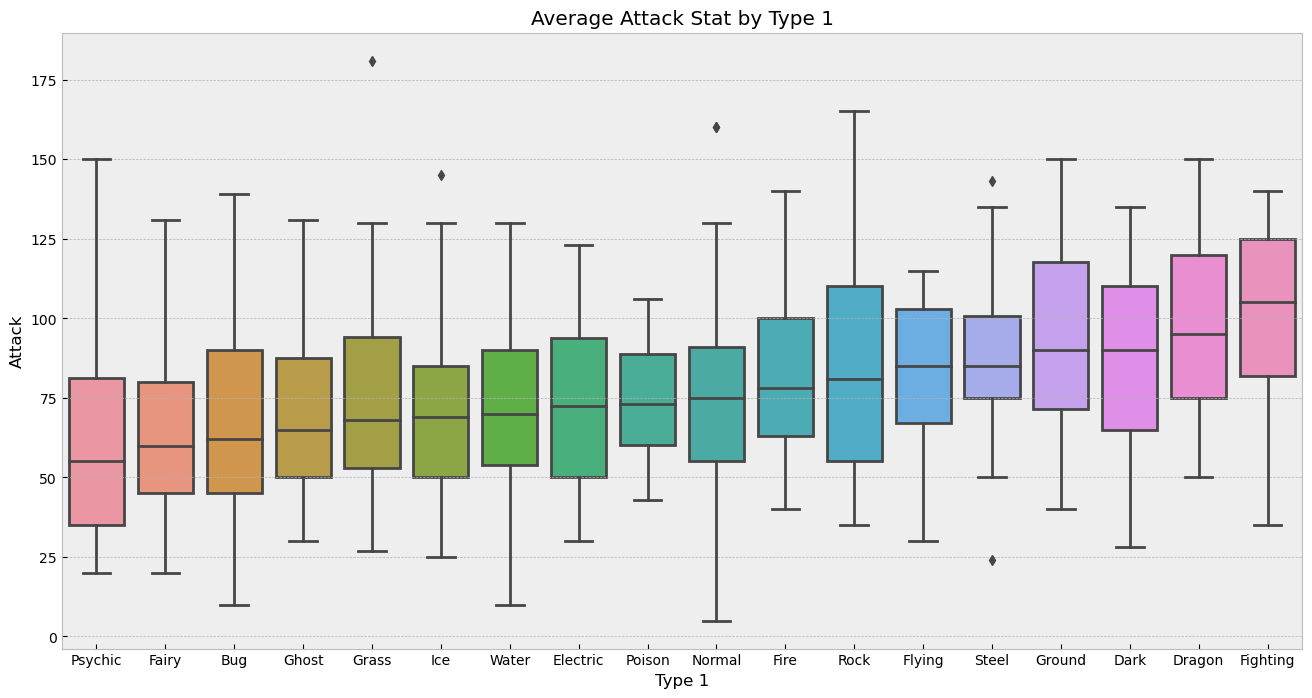

In [43]:
#the order parameter determines the order to plat categories in
#Normally, this graph would be in a different order, but we decided to order it
#by average attack stat
fig = plt.figure(figsize = (16,8))
sns.boxplot(x = 'Type 1', y = 'Attack', data = df, order = type1_attack_index)
plt.title('Average Attack Stat by Type 1')
plt.show()

In [44]:
type1_spattack = df.groupby(by = ['Type 1']).median()

In [45]:
type1_spattack['Sp. Attack']

Type 1
Bug         50.0
Dark        65.0
Dragon      70.0
Electric    83.0
Fairy       70.0
Fighting    50.0
Fire        80.0
Flying      60.0
Ghost       83.0
Grass       70.0
Ground      50.0
Ice         70.0
Normal      50.0
Poison      60.5
Psychic     92.5
Rock        55.0
Steel       57.5
Water       66.0
Name: Sp. Attack, dtype: float64

In [46]:
type1_spattack_index = type1_spattack['Sp. Attack'].sort_values().index

In [47]:
type1_spattack_index

Index(['Bug', 'Normal', 'Fighting', 'Ground', 'Rock', 'Steel', 'Flying',
       'Poison', 'Dark', 'Water', 'Ice', 'Fairy', 'Dragon', 'Grass', 'Fire',
       'Electric', 'Ghost', 'Psychic'],
      dtype='object', name='Type 1')

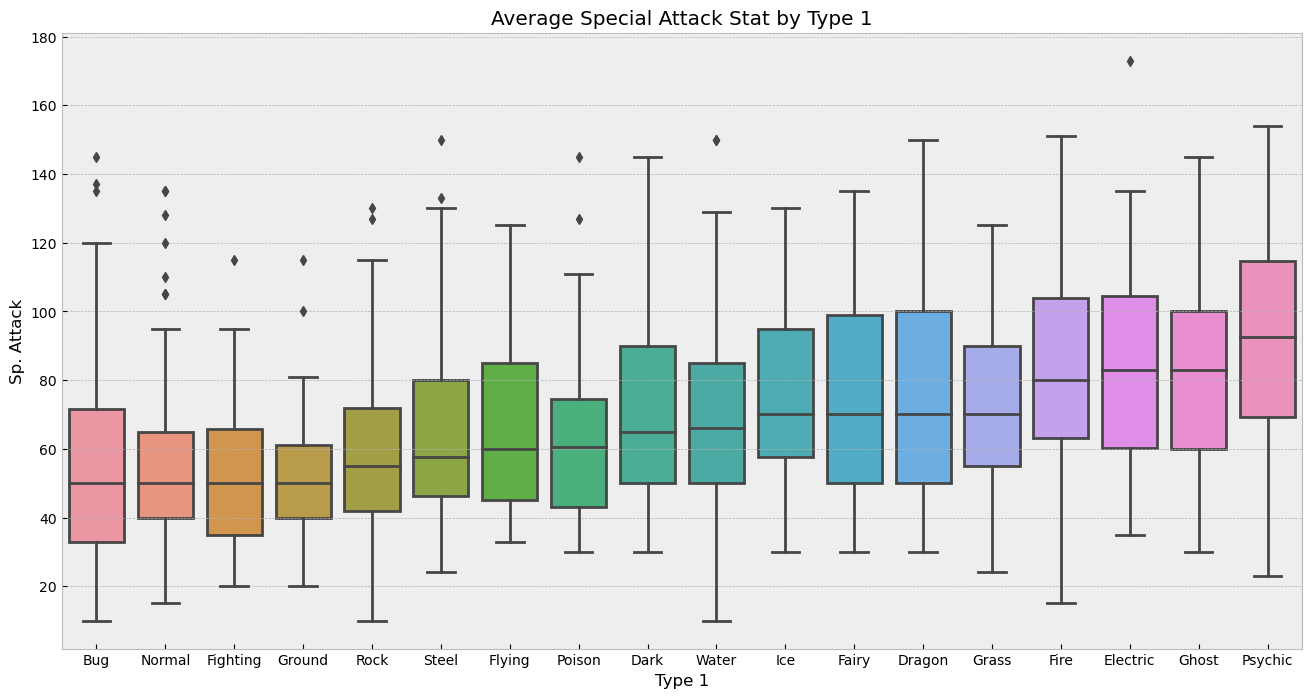

In [48]:
fig = plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Type 1', y = 'Sp. Attack', data = df, order = type1_spattack_index)
plt.title('Average Special Attack Stat by Type 1')
plt.show()

In [49]:
type1_defensive_stats = df.groupby(by = ['Type 1']).median()

In [50]:
type1_defensive_stats_index = type1_defensive_stats['Defensive Stats'].sort_values().index

In [51]:
type1_defensive_stats_index

Index(['Bug', 'Normal', 'Poison', 'Electric', 'Grass', 'Water', 'Dark', 'Fire',
       'Psychic', 'Flying', 'Fighting', 'Fairy', 'Ghost', 'Ice', 'Dragon',
       'Rock', 'Ground', 'Steel'],
      dtype='object', name='Type 1')

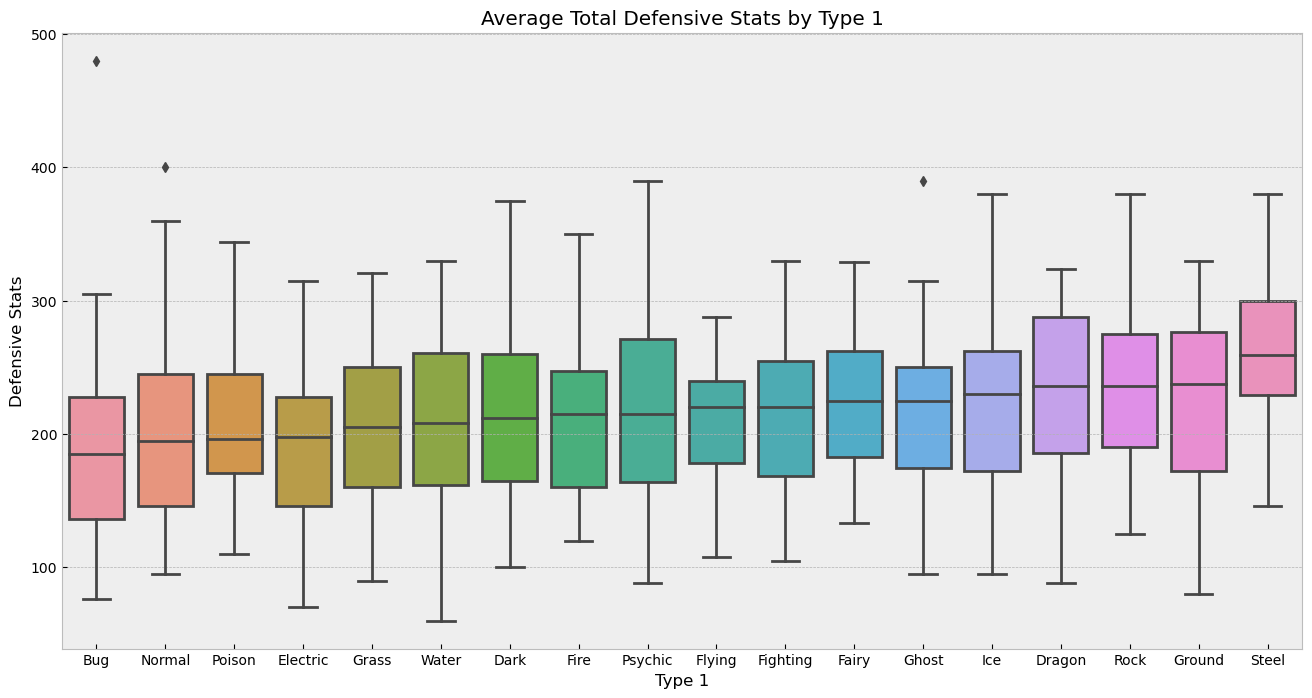

In [52]:
fig = plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Type 1', y = 'Defensive Stats', data = df, order = type1_defensive_stats_index)
plt.title('Average Total Defensive Stats by Type 1')
plt.show()

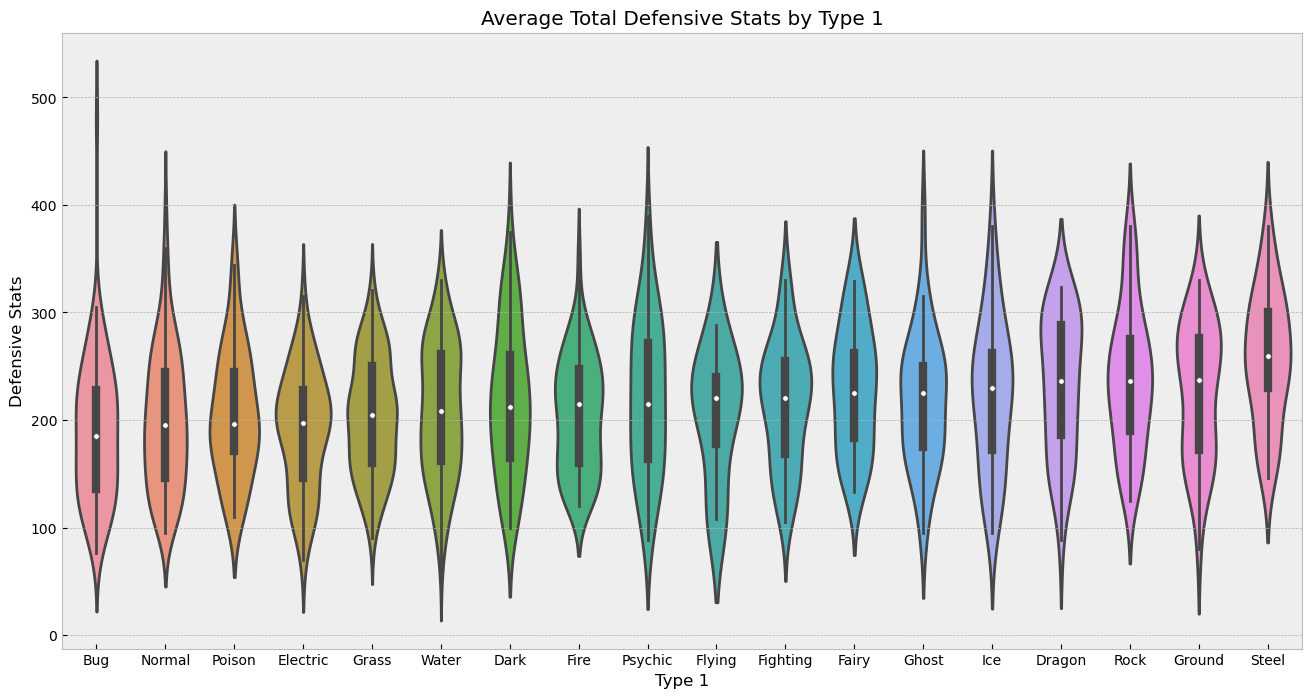

In [53]:
#A violinplot is similar to a boxplot, but the wider parts of the violin show density
#The wider a spot is, the more figures are in that area
fig = plt.figure(figsize = (16, 8))
sns.violinplot(x = 'Type 1', y = 'Defensive Stats', data = df, order = type1_defensive_stats_index)
plt.title('Average Total Defensive Stats by Type 1')
plt.show()

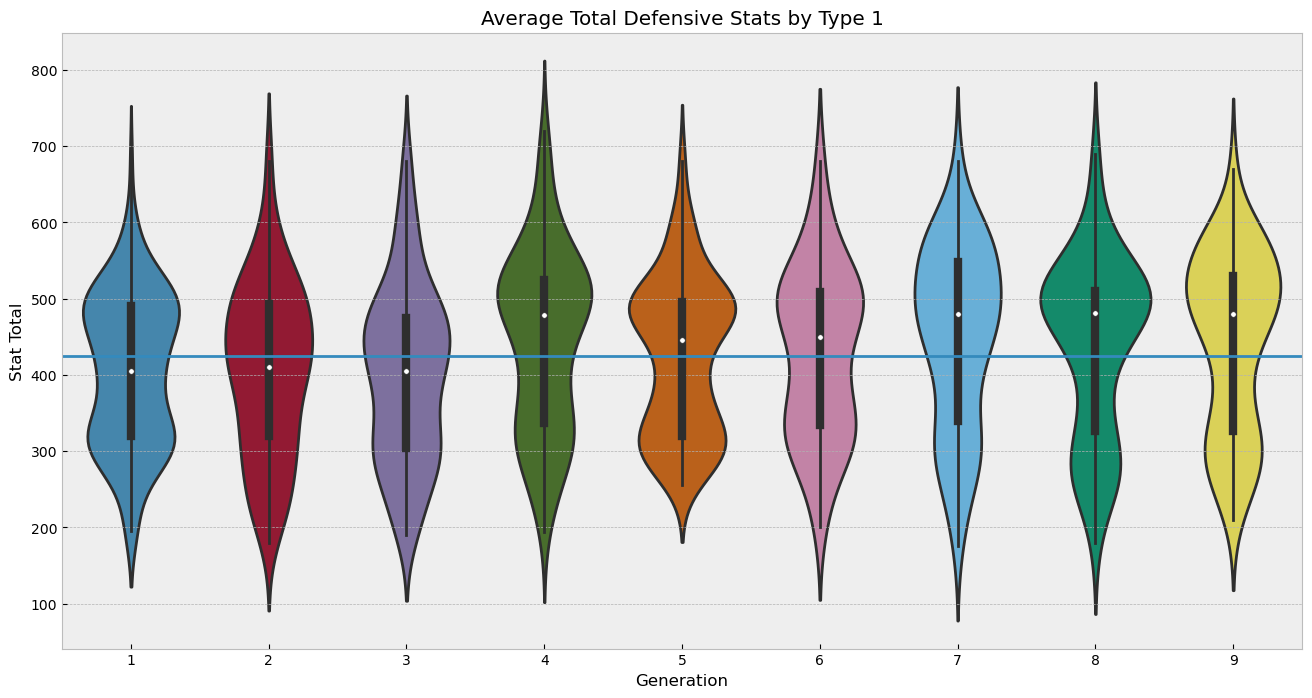

In [54]:
fig = plt.figure(figsize = (16, 8))
sns.violinplot(x = 'Generation', y = 'Stat Total', data = df)
plt.title('Average Total Defensive Stats by Type 1')
plt.axhline(df['Stat Total'].mean())
plt.show()

#axhline plots a line from the y axis across
#axvline plots a line from the x axis up

<AxesSubplot:>

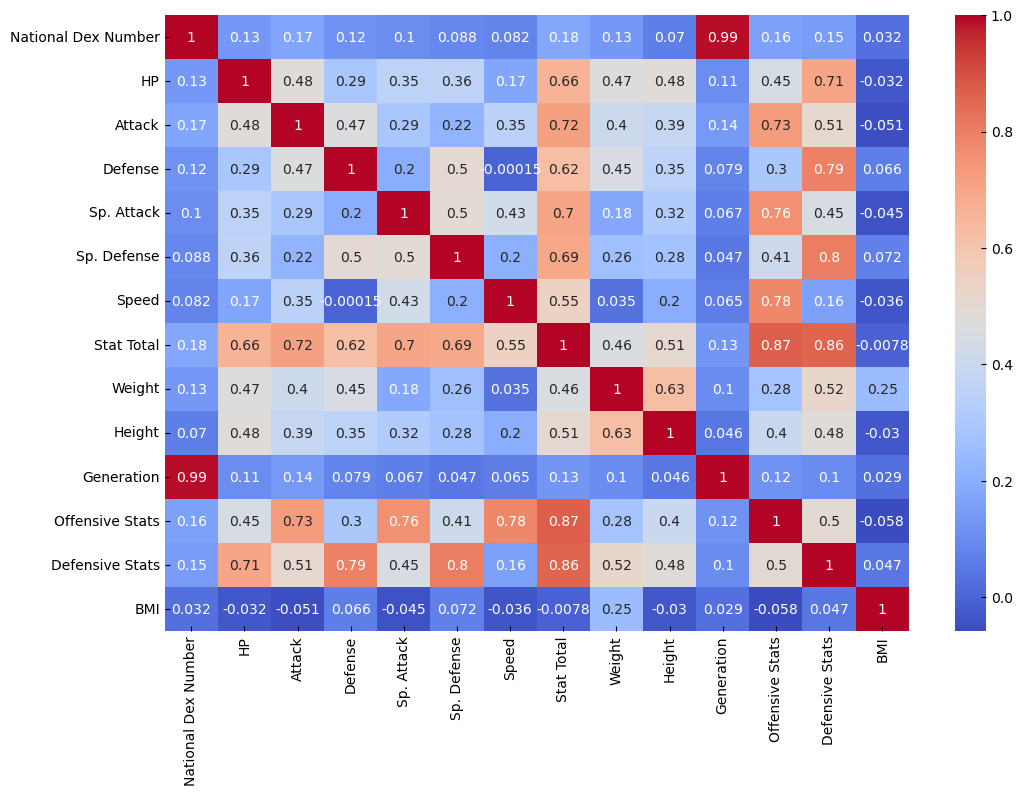

In [55]:
#Lastly, we have a heatmap to show any possible correlations between stats
#Unfortunately it doesn't look like Pokemon battle stat data is correlated
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')